In [5]:
import cv2
import dlib
import os
import numpy as np
import matplotlib.pyplot as plt

def crop_to_face_and_save(face_ref, reference_img):
    # Extract the face region from the reference image
    x, y, w, h = face_ref.left(), face_ref.top(), face_ref.width(), face_ref.height()
    face_img = reference_img[y:y+h, x:x+w]
    plt.imshow(face_img)

    # Save the extracted face region
    cv2.imwrite('reference_face.jpg', face_img)

#def match_bowler(reference_image_path, frames_folder, match_threshold=0.6):

# Initialize face detector and face recognition model
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Shape predictor model
face_rec_model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')  # Face recognition model

#detector(gray_ref)


In [6]:

def display_img_and_face(reference_image_path):

    # Load the reference image and detect faces
    reference_img = cv2.imread(reference_image_path)
    print(reference_img.shape)
    gray_ref = cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_ref)

    plt.figure()
    faces_ref = detector(gray_ref)
    print(faces_ref)
    crop_to_face_and_save(faces_ref[0], reference_img)


(1048, 1892, 3)
rectangles[[(1149, 573) (1235, 659)]]


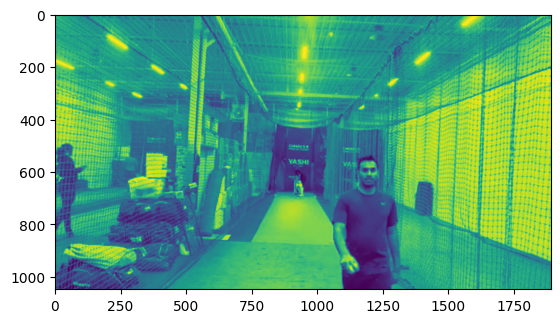

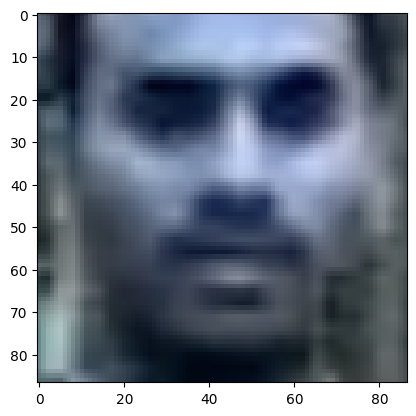

In [7]:
display_img_and_face('front.png')

(148, 206, 3)
rectangles[[(77, 37) (149, 109)]]


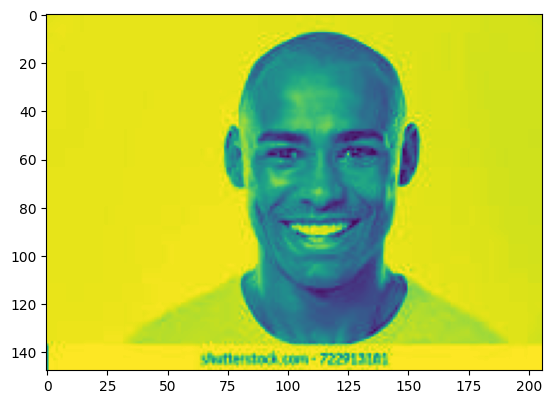

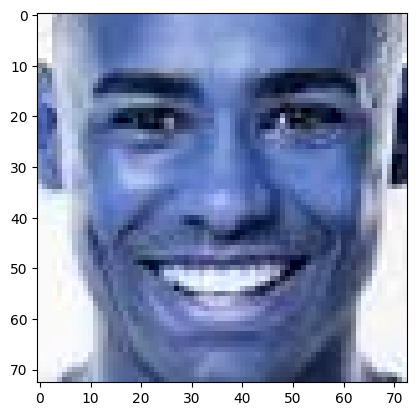

In [8]:
display_img_and_face('download.jpeg')

(1109, 2000)
rectangles[[(1494, 678) (1581, 765)]]


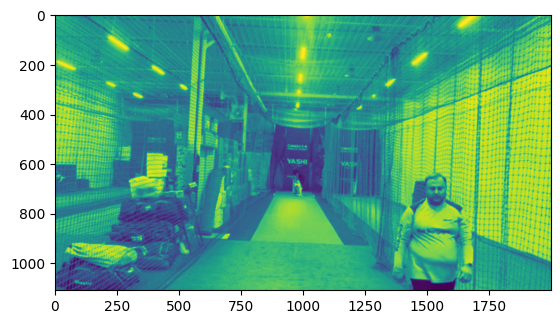

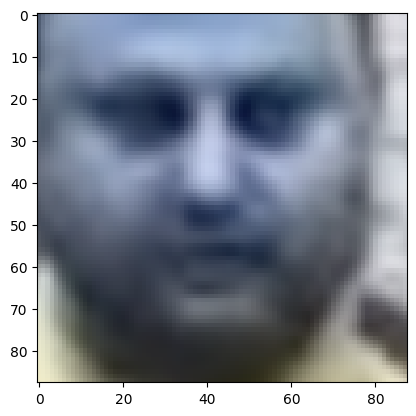

In [9]:
# Load the reference image and detect faces
reference_img = cv2.imread('sample1.png')
width = 2000
reference_img = cv2.resize(reference_img, (width, int(reference_img.shape[0] * (width / reference_img.shape[1]))))

gray_ref = cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY)


plt.imshow(gray_ref)
print(gray_ref.shape)

plt.figure()
faces_ref = detector(gray_ref)
print(faces_ref)
crop_to_face_and_save(faces_ref[0], reference_img)


0: 640x512 3 persons, 79.3ms
Speed: 2.7ms preprocess, 79.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 512)
Results:  3


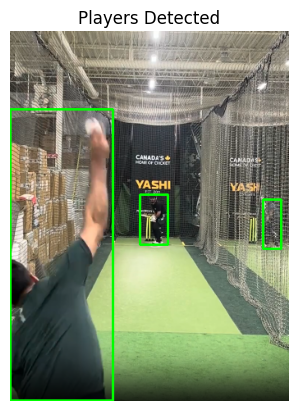

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 model trained on COCO (detects people, cricket bats, etc.)
model = YOLO("yolov8n.pt")


def crop_image(img):    
    width = img.shape[1]
    crop_amount = int(width * 0.3)  # 20% of width
    cropped_img = img[:, crop_amount:width-crop_amount]
    return cropped_img

def detect_players_plot(img):
    #img = cv2.imread(image_path)
    img = crop_image(img)
    results = model(img)  # Run inference
    num_players = len(results[0].boxes)
    print('Results: ', num_players)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
            label = model.names[int(box.cls[0])]  # Class label
            
            if label == "person":
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bbox
            
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Players Detected")
    plt.axis('off')
    plt.show()

# Example usage
detect_players_plot(cv2.imread("bowler_release_runner.png"))



0: 640x512 3 persons, 90.5ms
Speed: 2.2ms preprocess, 90.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)
Balls detected:  0


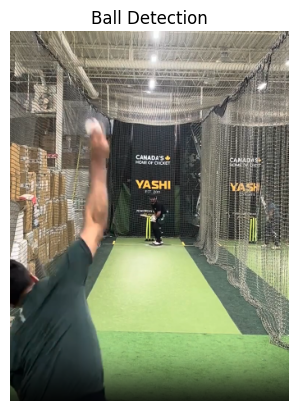

In [13]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load YOLOv8 model trained on COCO (detects sports balls)
model = YOLO("yolov8n.pt")


def crop_image(img):    
    width = img.shape[1]
    crop_amount = int(width * 0.3)  # 20% of width
    cropped_img = img[:, crop_amount:width-crop_amount]
    return cropped_img

def detect_ball_plot(img):
    img = crop_image(img)
    results = model(img)  # Run inference
    print(results)
    
    ball_count = 0
    for result in results:
        for box in result.boxes:
            label = model.names[int(box.cls[0])]  # Class label
            
            # COCO dataset includes sports balls like cricket ball, baseball etc
            if label == "sports ball":
                ball_count += 1
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bbox
    
    print('Balls detected: ', ball_count)
            
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Ball Detection")
    plt.axis('off')
    plt.show()

# Example usage
detect_ball_plot(cv2.imread("bowler_release_runner.png"))


In [1]:
from clip_extractor import find_clip_start
frame_number, frame = find_clip_start(video_path='highlight.mp4', start_frame=1000)


0: 640x256 2 bananas, 45.4ms
Speed: 1.6ms preprocess, 45.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 256)
Results:  2

0: 640x256 1 person, 1 sports ball, 31.0ms
Speed: 1.0ms preprocess, 31.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 256)
Results:  2

0: 640x256 1 person, 1 sports ball, 34.8ms
Speed: 1.0ms preprocess, 34.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 256)
Results:  2

0: 640x256 1 person, 1 sports ball, 33.6ms
Speed: 0.9ms preprocess, 33.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 256)
Results:  2

0: 640x256 1 person, 1 sports ball, 33.2ms
Speed: 1.0ms preprocess, 33.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 256)
Results:  2

0: 640x256 1 person, 1 sports ball, 33.0ms
Speed: 1.1ms preprocess, 33.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 256)
Results:  2

0: 640x256 1 person, 1 sports ball, 36.6ms
Speed: 1.1ms preprocess, 36.6ms inference, 0.5ms pos

In [2]:
frame_number

992

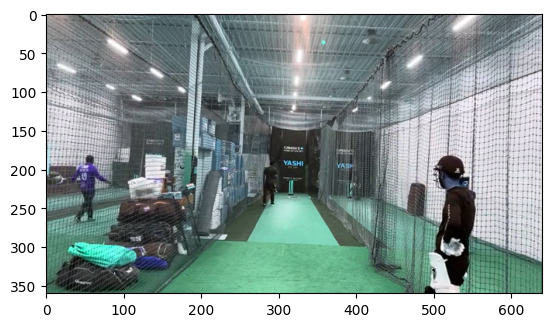

In [6]:
plt.imshow(frame)


0: 640x256 1 sports ball, 42.4ms
Speed: 3.2ms preprocess, 42.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 256)
Results:  1


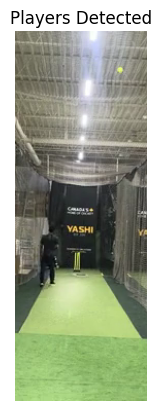

In [11]:
detect_players_plot(frame)

In [5]:
import cv2
import dlib
import os
import numpy as np
import matplotlib.pyplot as plt

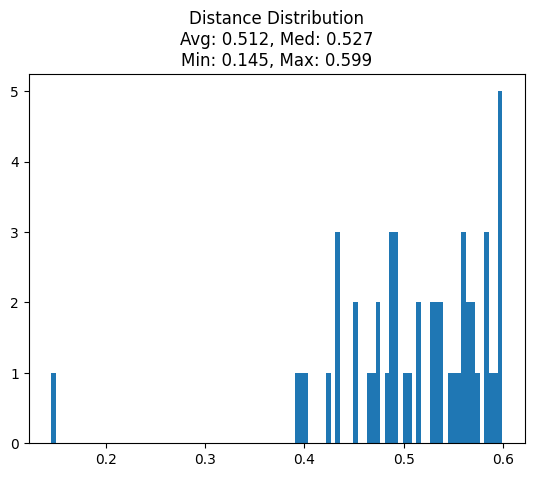

In [ ]:


def crop_to_face_and_save(face_ref, reference_img, write=True):
    # Extract the face region from the reference image
    x, y, w, h = face_ref.left(), face_ref.top(), face_ref.width(), face_ref.height()
    face_img = reference_img[y:y+h, x:x+w]

    # Save the extracted face region
    if write:
        cv2.imwrite('reference_face.jpg', face_img)
    return face_img

def preprocess_frame(frame, width=2500):

    #print('Channels: ', len(frame.shape))
    # if len(frame.shape) == 3:  # If image is color (has 3 channels)
    #     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    height = int(frame.shape[0] * (width / frame.shape[1]))
    frame = cv2.resize(frame, (width, height))
    return frame


def match_bowler(reference_image_path, frames_folder, match_threshold=0.6):

    # Initialize face detector and face recognition model
    detector = dlib.get_frontal_face_detector()
    sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')  # Shape predictor model
    face_rec_model = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')  # Face recognition model

    # Load the reference image and detect faces
    reference_img = cv2.imread(reference_image_path)
    reference_img = preprocess_frame(reference_img)
    if reference_img is None:
        print(f"Could not load the image {reference_image_path}. Please check the file.")
        return []
    
    gray_ref = cv2.cvtColor(reference_img, cv2.COLOR_BGR2GRAY)
    faces_ref = detector(gray_ref)

    
    #print('Number of faces detected in the reference image: ', len(faces_ref))
    
    if len(faces_ref) == 0:
        return []
    
    # Assume there's only one face in the reference image (the bowler's face)
    face_ref = faces_ref[0]
    crop_to_face_and_save(face_ref, reference_img)
    
    shape_ref = sp(reference_img, face_ref)
    
    # Get the face descriptor (embedding) for the reference face
    face_descriptor_ref = face_rec_model.compute_face_descriptor(reference_img, shape_ref)

    matched_frames = []
    distances = []
    faces = []
    
    # Iterate through frames in the folder
    for frame_file in sorted(os.listdir(frames_folder)):
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        if frame is None:
            print(f"Failed to load frame: {frame_path}")
            continue
        frame = preprocess_frame(frame)
        
        if frame is None:
            continue
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detect faces in the frame
        faces_frame = detector(gray_frame)
        #print('Number of faces detected: ', len(faces_frame), 'in frame: ', frame_file)
        for face in faces_frame:

            shape_frame = sp(frame, face)
            
            # Get the face descriptor (embedding) for the detected face in the frame
            face_descriptor_frame = face_rec_model.compute_face_descriptor(frame, shape_frame)
            
            # Compare the descriptors using Euclidean distance
            distance = np.linalg.norm(np.array(face_descriptor_ref) - np.array(face_descriptor_frame))


            #print('Distance: ', distance) 
            # If the distance is below the threshold, it's considered a match
            if distance < match_threshold:
                distances.append(distance)
                faces.append(crop_to_face_and_save(face, frame, write=False))
                frame_index = int(frame_file.split('_')[1].split('.')[0])
                matched_frames.append(frame_index)
                break  # Stop after finding the first matching face
        
    # print distasnce statistics aveage, median, min, max

    # save plot of distribution of distances
    
    plt.hist(distances, bins=100)
    plt.savefig('distance_distribution.png')
    plt.title(f'Distance Distribution\nAvg: {np.mean(distances):.3f}, Med: {np.median(distances):.3f}\nMin: {np.min(distances):.3f}, Max: {np.max(distances):.3f}')
    matched_frames.sort()
    return matched_frames, faces, distances


reference_image_path = 'front.png'
frames_folder = 'frames_actual/'
matched_frames, faces, distances = match_bowler(reference_image_path, frames_folder)

In [5]:
# sort faces by distance
sorted_faces = [x for _, x in sorted(zip(distances, faces), key=lambda pair: pair[0])]
sorted_distances = sorted(distances)

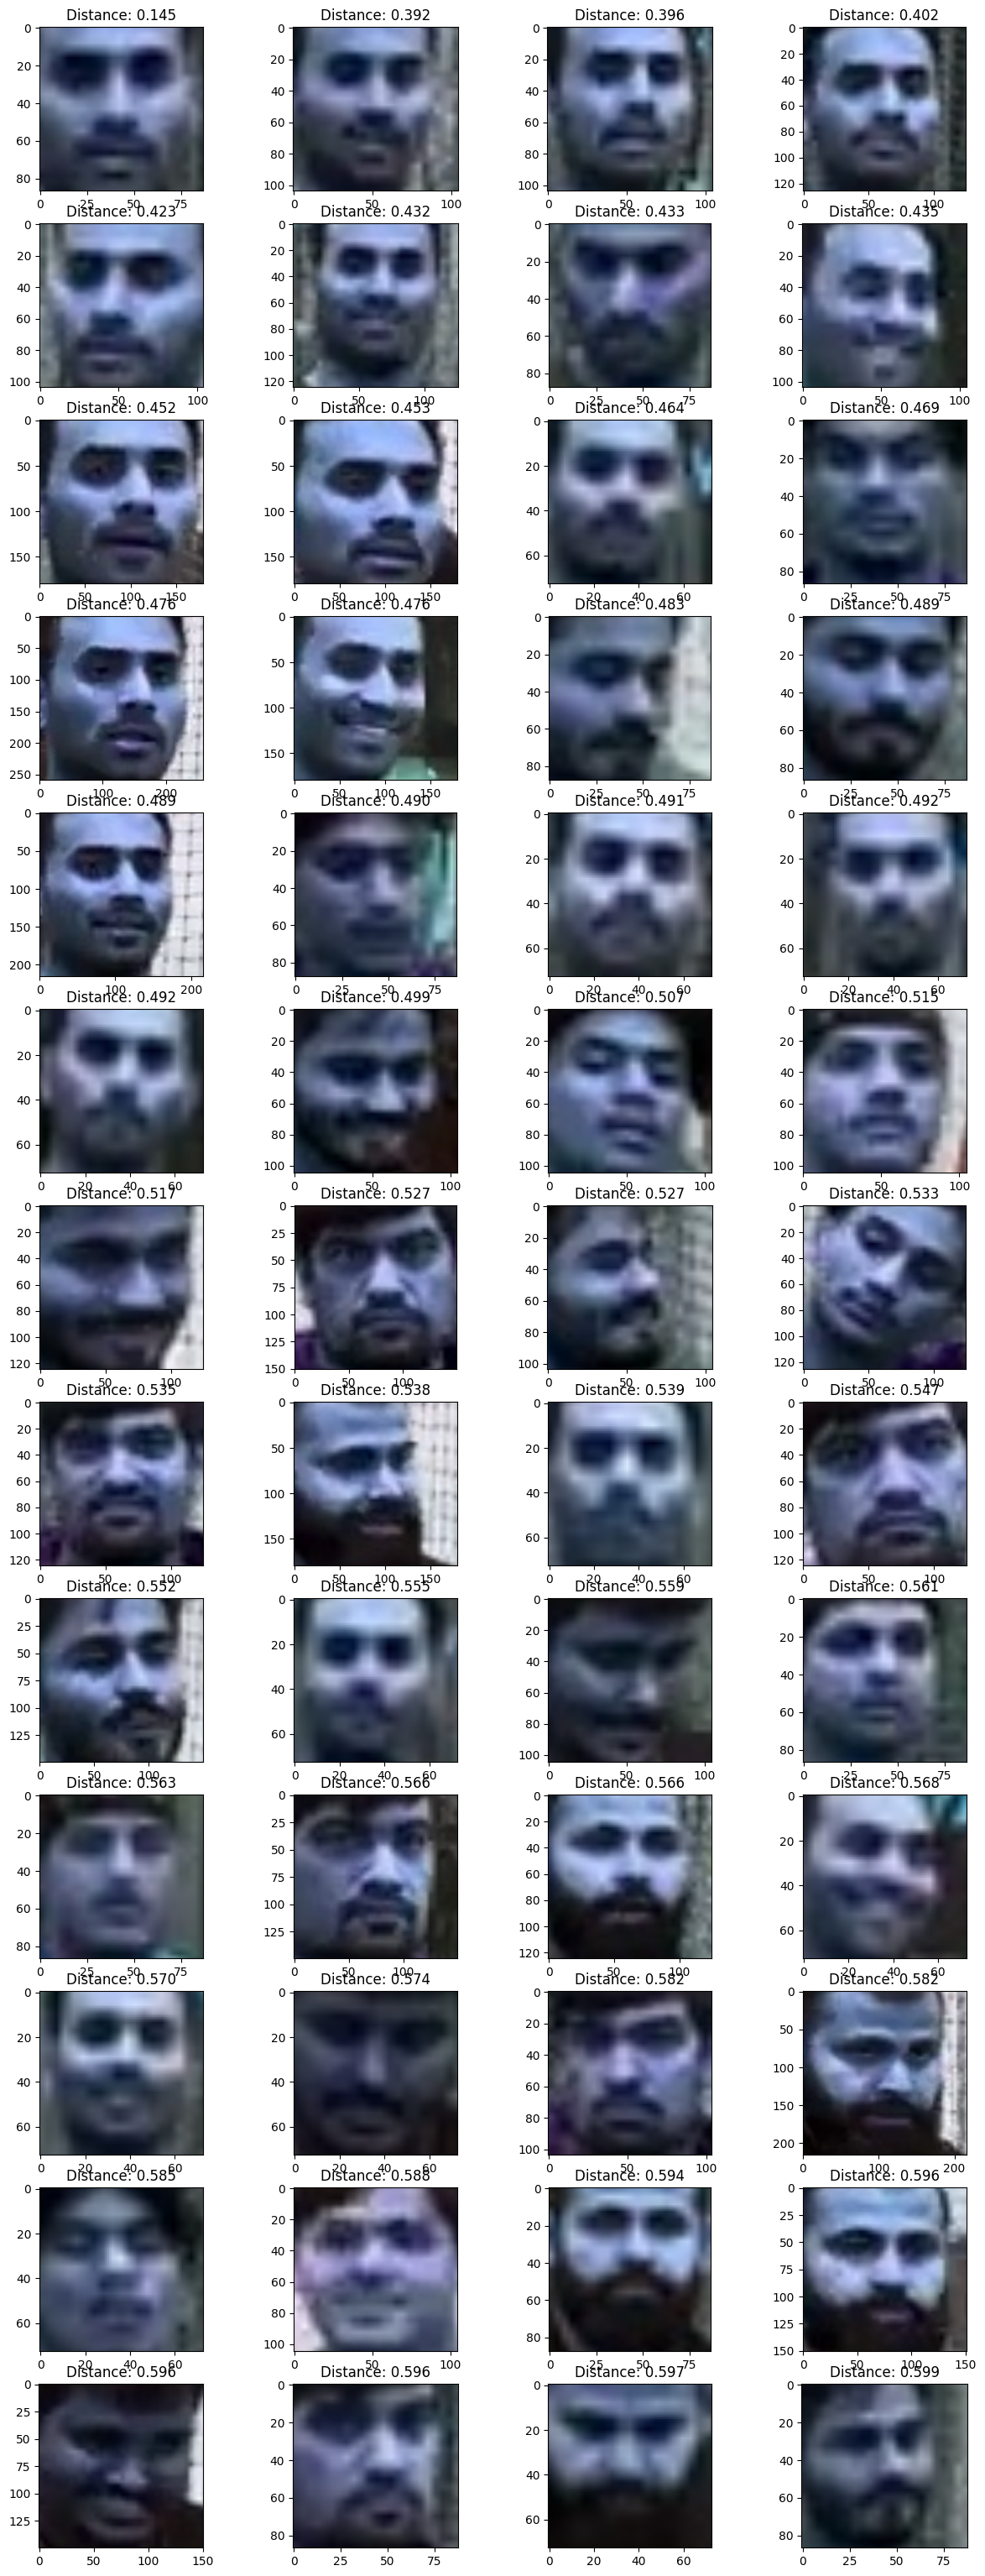

In [6]:
# plot faces and their distances using matplotlib

n = len(faces)
cols = 4
rows = (n + cols - 1) // cols  # Ceiling division to handle cases where n isn't divisible by cols

fig = plt.figure(figsize=(15, 3*rows))
for i, (face, distance) in enumerate(zip(sorted_faces, sorted_distances)):
    plt.subplot(rows, cols, i+1)
    plt.imshow(face)
    plt.title(f'Distance: {distance:.3f}')
